In [30]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import os
# import the path
path = os.path.abspath(os.path.join("..", "01_get_the_data", "spy_historical_data.csv"))

# Load the CSV
df = pd.read_csv(path)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# convert df.datetime to datetime
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')

# Show the result
df.head()

,datetime,SPY
0,2021-08-31 16:30:00,451.56
1,2021-09-01 16:30:00,451.80
2,2021-09-02 16:30:00,453.19
3,2021-09-03 16:30:00,453.08
4,2021-09-07 16:30:00,451.46


In [31]:
# Calculate simple returns with pct_change()
simple_returns = df['SPY'].pct_change().fillna(0)

daily_returns = simple_returns.copy()

In [32]:
# Set datetime as index for daily_returns
daily_returns.index = df['datetime']

# resample returns to monthly frequency
monthly_returns = daily_returns.resample('M').agg(lambda x: (1 + x).prod() - 1)
monthly_returns.head()

datetime
2021-08-31    0.000000
2021-09-30   -0.049650
2021-10-31    0.070164
2021-11-30   -0.008035
2021-12-31    0.042585
Freq: ME, Name: SPY, dtype: float64

In [33]:
# expected mean returns
expected_mean_daily_returns = daily_returns.mean()
expected_mean_monthly_returns = monthly_returns.mean()

# print mean returns
print("Expected Mean Daily Returns:", expected_mean_daily_returns)
print("Expected Mean Monthly Returns:", expected_mean_monthly_returns)

Expected Mean Daily Returns: 0.0004198746454049249
Expected Mean Monthly Returns: 0.008371538337790042


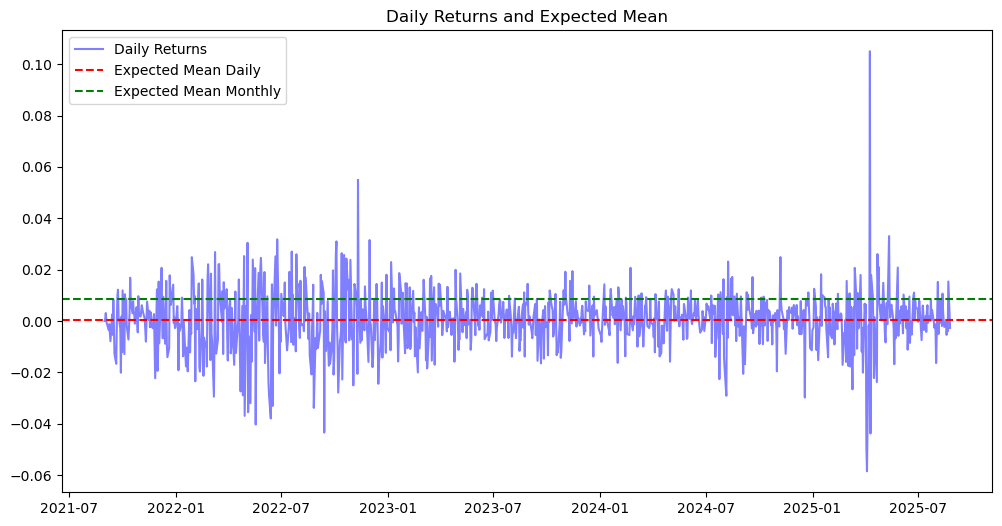

In [ ]:
# plot daily returns, expected mean daily and monthly returns
plt.figure(figsize=(12, 6))
plt.plot(daily_returns, label='Daily Returns', color='blue', alpha=0.5)
plt.axhline(y=expected_mean_daily_returns, color='red', linestyle='--', label='Expected Mean Daily')
plt.axhline(y=expected_mean_monthly_returns, color='green', linestyle='--', label='Expected Mean Monthly')
plt.title('Daily Returns and Expected Mean')
plt.legend()
plt.show()